In [13]:
# Libraries used in analysis process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

In [14]:
#Import data using pandas read_csv 
data = pd.read_csv("C:/Users/holtb/OneDrive/Documents/GitHub/D214_Data_Analytics_Graduate_Capstone/rrf_foia_210817.csv")

#Transform ApprovalDate to pandas datatime format
data['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'], format = "%m/%d/%Y")

In [15]:
#Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100650 entries, 0 to 100649
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   LoanNumber                        100650 non-null  int64         
 1   ApprovalDate                      100650 non-null  datetime64[ns]
 2   BusinessName                      100650 non-null  object        
 3   BusinessAddress                   100650 non-null  object        
 4   BusinessCity                      100649 non-null  object        
 5   BusinessState                     100650 non-null  object        
 6   BusinessZip                       100650 non-null  int64         
 7   GrantAmount                       100650 non-null  float64       
 8   FranchiseName                     10153 non-null   object        
 9   RuralUrbanIndicator               100650 non-null  object        
 10  HubzoneIndicator                

In [16]:
#Check for missing data
data.isnull().sum()

LoanNumber                              0
ApprovalDate                            0
BusinessName                            0
BusinessAddress                         0
BusinessCity                            1
BusinessState                           0
BusinessZip                             0
GrantAmount                             0
FranchiseName                       90497
RuralUrbanIndicator                     0
HubzoneIndicator                        0
CD                                      1
grant_purp_cons_outdoor_seating         0
grant_purpose_covered_supplier          0
grant_purpose_debt                      0
grant_purpose_food                      0
grant_purpose_maintenance_indoor        0
grant_purpose_operations                0
grant_purpose_payroll                   0
grant_purpose_rent                      0
grant_purpose_supplies                  0
grant_purpose_utility                   0
LegalOrganizationType                   0
LMIIndicator                      

In [17]:
#Inspecting rows with null values of CD feature
data[data['CD'].isnull()]

,LoanNumber,ApprovalDate,BusinessName,BusinessAddress,BusinessCity,BusinessState,BusinessZip,GrantAmount,FranchiseName,RuralUrbanIndicator,...,grant_purpose_payroll,grant_purpose_rent,grant_purpose_supplies,grant_purpose_utility,LegalOrganizationType,LMIIndicator,SocioeconmicIndicator,VeteranIndicator,WomenOwnedIndicator,RestaurantType
30396,4880239002,2021-05-20,Hangyeol LLC,1 SW Columbia St,Portland,OR,97258,113365.0,NaN,U,...,Y,Y,Y,Y,Limited Liability Company(LLC),N,N,N,Y,Restaurant


In [18]:
#Inspecting rows with null values of LMIIndicator feature
data[data['LMIIndicator'].isnull()]

,LoanNumber,ApprovalDate,BusinessName,BusinessAddress,BusinessCity,BusinessState,BusinessZip,GrantAmount,FranchiseName,RuralUrbanIndicator,...,grant_purpose_payroll,grant_purpose_rent,grant_purpose_supplies,grant_purpose_utility,LegalOrganizationType,LMIIndicator,SocioeconmicIndicator,VeteranIndicator,WomenOwnedIndicator,RestaurantType
42225,7249019008,2021-05-25,Antonio Vitolo,2305 N Gateway Ave Unit 13,Harriman,TN,37748,104590.20,NaN,R,...,Y,Y,Y,Y,Sole Proprietorship,NaN,N,N,N,Restaurant
91651,9855639005,2021-06-01,PSBH LLC,600 OLD WEST CHOCOLATE AVE,HERSHEY,PA,17033,640424.65,NaN,U,...,Y,Y,Y,Y,Limited Liability Company(LLC),NaN,N,N,N,"Bar, Saloon, Lounge, Tavern && Caterer && Rest..."


In [19]:
#Filling no franchisename with 'None'
data['FranchiseName'].fillna('None', inplace= True)

In [20]:
#Verify all missing inputs were imputed
data['FranchiseName'].isnull().sum()

0

In [21]:
#Conduct value count of FranchiseName
data['FranchiseName'].value_counts()

None                      90497
Subway                     2868
Dunkin' Donuts              302
IHOP                        296
Kona Ice                    206
                          ...  
French Press Coffee           1
J. Gumbo's                    1
The Tin Fish                  1
Gino's East of Chicago        1
Bout Time Pub & Grub          1
Name: FranchiseName, Length: 976, dtype: int64

In [22]:
#Drop remaining rows with missing data
data.dropna(axis=0, inplace= True)

In [12]:
#Check for missing data after cleaning
data.isnull().sum()

LoanNumber                          0
ApprovalDate                        0
BusinessName                        0
BusinessAddress                     0
BusinessCity                        0
BusinessState                       0
BusinessZip                         0
GrantAmount                         0
FranchiseName                       0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
CD                                  0
grant_purp_cons_outdoor_seating     0
grant_purpose_covered_supplier      0
grant_purpose_debt                  0
grant_purpose_food                  0
grant_purpose_maintenance_indoor    0
grant_purpose_operations            0
grant_purpose_payroll               0
grant_purpose_rent                  0
grant_purpose_supplies              0
grant_purpose_utility               0
LegalOrganizationType               0
LMIIndicator                        0
SocioeconmicIndicator               0
VeteranIndicator                    0
WomenOwnedIn

In [13]:
#Check for duplicate loan applications
data['LoanNumber'].duplicated().sum()

0

In [14]:
#Check for duplicate business names and addresses
column_names = ['BusinessName', 'BusinessAddress']
data.duplicated(subset=column_names).sum()

4

In [15]:
#Input duplicate rows into variable and display
duplicates = data.duplicated(subset=column_names, keep = False)
data[duplicates]

,LoanNumber,ApprovalDate,BusinessName,BusinessAddress,BusinessCity,BusinessState,BusinessZip,GrantAmount,FranchiseName,RuralUrbanIndicator,...,grant_purpose_payroll,grant_purpose_rent,grant_purpose_supplies,grant_purpose_utility,LegalOrganizationType,LMIIndicator,SocioeconmicIndicator,VeteranIndicator,WomenOwnedIndicator,RestaurantType
323,1039659104,2021-06-17,Bob's Pizza Plus Inc,8585 Gooch Hill Rd,Bozeman,MT,59718,74115.02,None,R,...,Y,Y,Y,Y,Subchapter S Corporation,N,N,N,N,Restaurant
23258,2754899001,2021-05-18,geongmi Jeon,4059 Tweedy Blvd,South Gate,CA,90280,54752.00,None,U,...,Y,Y,Y,Y,Sole Proprietorship,N,Y,N,Y,"Bar, Saloon, Lounge, Tavern"
47029,7532119009,2021-05-25,TYLER JARMAN,1438 E 96th Dr,Thornton,CO,80229,240985.97,None,U,...,Y,Y,Y,N,Sole Proprietorship,Y,Y,N,N,"Food Stand, Food Truck, Food Cart"
47556,7534768906,2021-05-07,geongmi Jeon,4059 Tweedy Blvd,South Gate,CA,90280,54752.00,None,U,...,Y,Y,Y,Y,Self-Employed Individuals,N,Y,N,Y,"Bar, Saloon, Lounge, Tavern"
52261,7558488910,2021-05-07,Lynne Khow,17901 Pioneer Blvd Ste E,Artesia,CA,90701,33113.00,None,U,...,Y,Y,Y,Y,Sole Proprietorship,N,N,N,Y,Restaurant
52373,7559049001,2021-05-25,TYLER JARMAN,1438 E 96th Dr,Thornton,CO,80229,232483.25,None,U,...,Y,Y,Y,Y,Sole Proprietorship,Y,Y,N,N,"Food Stand, Food Truck, Food Cart"
60869,7628018905,2021-05-07,Lynne Khow,17901 Pioneer Blvd Ste E,Artesia,CA,90701,68724.00,None,U,...,Y,Y,Y,Y,Sole Proprietorship,N,N,N,Y,Restaurant
91596,8991579000,2021-05-29,Bob's Pizza Plus Inc,8585 Gooch Hill Rd,Bozeman,MT,59718,239745.24,None,R,...,Y,Y,Y,Y,Subchapter S Corporation,N,N,N,N,Restaurant


In [16]:
# Drop unneeded variables
data.drop(['LoanNumber','ApprovalDate', 'BusinessName', 'BusinessAddress', 'BusinessCity', 'BusinessZip'], axis=1, inplace=True)

In [17]:
#Conduct value count of FranchiseName
data['FranchiseName'].value_counts()

None                      90493
Subway                     2868
Dunkin' Donuts              302
IHOP                        296
Kona Ice                    206
                          ...  
French Press Coffee           1
J. Gumbo's                    1
The Tin Fish                  1
Gino's East of Chicago        1
Bout Time Pub & Grub          1
Name: FranchiseName, Length: 976, dtype: int64

In [18]:
#Create function that imputes values "Y" or "N" based on if Franchise or not
def franchise(row):
    if row == 'None':
        return '0'
    else:
        return '1'

In [19]:
# Apply franchise function to create new column Franchise
data['Franchise'] = data['FranchiseName'].apply(franchise)

In [20]:
data['Franchise'].head()

0    0
1    0
2    1
3    0
4    1
Name: Franchise, dtype: object

In [21]:
#Conduct value count of BusinessState
data['BusinessState'].value_counts()

CA    15961
NY     9753
TX     6372
FL     5710
IL     4533
PA     3503
MI     3288
WA     3236
NJ     3077
OH     2830
VA     2717
GA     2656
NC     2569
MA     2551
OR     2336
WI     2091
MD     2018
CO     1763
MN     1717
LA     1388
AZ     1324
CT     1300
IN     1189
MO     1189
TN     1158
HI     1145
SC     1042
AL      874
IA      847
KY      808
NV      763
DC      729
OK      684
ME      629
KS      602
NM      601
AR      507
MS      505
NE      470
UT      468
RI      442
NH      417
AK      384
VT      366
PR      339
MT      328
ID      304
DE      285
WV      272
SD      193
ND      170
WY      123
GU       79
VI       28
MP       12
AS        1
Name: BusinessState, dtype: int64

In [22]:
#Exploring LegalOrganizationType names and counts with value_counts
data['LegalOrganizationType'].value_counts()

Limited  Liability Company(LLC)        38986
Corporation                            37201
Subchapter S Corporation               11647
Sole Proprietorship                     8056
Partnership                             1544
Limited Liability Partnership           1144
Single Member LLC                       1087
Self-Employed Individuals                612
Cooperative                              107
Independent Contractors                  106
Professional Association                  75
Non-Profit Organization                   36
Joint Venture                             13
Qualified Joint-Venture (spouses)         10
Trust                                      7
Employee Stock Ownership Plan(ESOP)        5
Tribal Concerns                            4
501(c)19 – Non Profit Veterans             2
501(c)3 – Non Profit                       2
Tenant in Common                           1
Non-Profit Childcare Center                1
Name: LegalOrganizationType, dtype: int64

In [23]:
#Impute list of unique organizational types with less than 0 values into org_names variable
org_names = ['Self-Employed Individuals', 'Cooperative', 'Independent Contractors', 'Professional Association', 'Non-Profit Organization', 'Joint Venture', 
             'Qualified Joint-Venture (spouses)', 'Trust', 'Employee Stock Ownership Plan(ESOP)', 'Tribal Concerns', '501(c)19 – Non Profit Veterans', '501(c)3 – Non Profit', 
             'Tenant in Common', 'Non-Profit Childcare Center']

In [24]:
#Replace org_names with 'Other' in data frame 
data['LegalOrganizationType'].replace(org_names, 'Other', inplace= True)

In [25]:
#Checking collapsed data with value_count function
data['LegalOrganizationType'].value_counts()

Limited  Liability Company(LLC)    38986
Corporation                        37201
Subchapter S Corporation           11647
Sole Proprietorship                 8056
Partnership                         1544
Limited Liability Partnership       1144
Single Member LLC                   1087
Other                                981
Name: LegalOrganizationType, dtype: int64

In [26]:
#Conduct value count of type of applicants
data['RestaurantType'].head()

0    Restaurant
1    Restaurant
2    Restaurant
3    Restaurant
4    Restaurant
Name: RestaurantType, dtype: object

In [27]:
#Split into list using '&&' as the delimiter and impute each value in the lists into seperate columns
data['Type1'] = data['RestaurantType'].str.split('&&', expand=True)[0]
data['Type2'] = data['RestaurantType'].str.split('&&', expand=True)[1]
data['Type3'] = data['RestaurantType'].str.split('&&', expand=True)[2]
data['Type4'] = data['RestaurantType'].str.split('&&', expand=True)[3]
data['Type5'] = data['RestaurantType'].str.split('&&', expand=True)[4]
data['Type6'] = data['RestaurantType'].str.split('&&', expand=True)[5]

In [28]:
#Strip all white space from the values in each column
data['Type1'] = data['Type1'].str.strip()
data['Type2'] = data['Type2'].str.strip()
data['Type3'] = data['Type3'].str.strip()
data['Type4'] = data['Type4'].str.strip()
data['Type5'] = data['Type5'].str.strip()
data['Type6'] = data['Type6'].str.strip()


In [29]:
#Remove " **" annotations from the data
data['Type1'] = data['Type1'].str.replace(' \*\*', '', regex= True)
data['Type2'] = data['Type2'].str.replace(' \*\*', '', regex= True)
data['Type3'] = data['Type3'].str.replace(' \*\*', '', regex= True)
data['Type4'] = data['Type4'].str.replace(' \*\*', '', regex= True)
data['Type5'] = data['Type5'].str.replace(' \*\*', '', regex= True)
data['Type6'] = data['Type6'].str.replace(' \*\*', '', regex= True)

In [30]:
#Conduct value count of Type1 
data['Type1'].value_counts()

Restaurant                             62064
Bar, Saloon, Lounge, Tavern            12354
Caterer                                 8400
Other                                   4977
Food Stand, Food Truck, Food Cart       4539
Snack and Nonalcoholic Beverage Bar     3532
Bakery                                  2048
Licensed Alcohol Producer                979
Brewery and/or microbrewery              573
Brewpub, Tasting Room, Taproom           515
Inn                                      364
Winery                                   236
Distillery                                65
Name: Type1, dtype: int64

In [31]:
#Conduct value count of Type2
data['Type2'].value_counts()

Restaurant                             13135
Caterer                                 2727
Food Stand, Food Truck, Food Cart       1863
Bar, Saloon, Lounge, Tavern             1444
Snack and Nonalcoholic Beverage Bar      858
Licensed Alcohol Producer                431
Brewpub, Tasting Room, Taproom           421
Brewery and/or microbrewery              263
Bakery                                   228
Winery                                   143
Distillery                                37
Inn                                       36
Other                                      2
Name: Type2, dtype: int64

In [32]:
#Conduct value count of Type3
data['Type3'].value_counts()

Restaurant                             3933
Caterer                                 604
Food Stand, Food Truck, Food Cart       492
Bar, Saloon, Lounge, Tavern             320
Brewpub, Tasting Room, Taproom          298
Brewery and/or microbrewery             131
Snack and Nonalcoholic Beverage Bar     128
Winery                                   41
Distillery                               18
Bakery                                   12
Inn                                      11
Licensed Alcohol Producer                 8
Name: Type3, dtype: int64

In [33]:
#Conduct value count of Type4
data['Type4'].value_counts()

Restaurant                             914
Brewpub, Tasting Room, Taproom         145
Caterer                                128
Food Stand, Food Truck, Food Cart       96
Bar, Saloon, Lounge, Tavern             87
Snack and Nonalcoholic Beverage Bar     16
Brewery and/or microbrewery             13
Winery                                   6
Licensed Alcohol Producer                4
Bakery                                   3
Inn                                      3
Name: Type4, dtype: int64

In [34]:
#Conduct value count of Type5
data['Type5'].value_counts()

Restaurant                             251
Bar, Saloon, Lounge, Tavern             53
Caterer                                 38
Food Stand, Food Truck, Food Cart       19
Brewpub, Tasting Room, Taproom          13
Snack and Nonalcoholic Beverage Bar     10
Brewery and/or microbrewery              5
Inn                                      2
Licensed Alcohol Producer                2
Name: Type5, dtype: int64

In [35]:
#Conduct value count of Type6
data['Type6'].value_counts()

Restaurant                           72
Food Stand, Food Truck, Food Cart    14
Caterer                               9
Bar, Saloon, Lounge, Tavern           7
Brewpub, Tasting Room, Taproom        4
Bakery                                3
Name: Type6, dtype: int64

In [36]:
data[data['Type2'] == 'Snack and Nonalcoholic Beverage Bar']

,BusinessState,GrantAmount,FranchiseName,RuralUrbanIndicator,HubzoneIndicator,CD,grant_purp_cons_outdoor_seating,grant_purpose_covered_supplier,grant_purpose_debt,grant_purpose_food,...,VeteranIndicator,WomenOwnedIndicator,RestaurantType,Franchise,Type1,Type2,Type3,Type4,Type5,Type6
77,NY,128413.00,Subway,R,N,NY-27,N,Y,Y,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar &...,1,Other,Snack and Nonalcoholic Beverage Bar,Restaurant,None,None,None
152,NY,202903.50,None,U,N,NY-07,Y,Y,Y,Y,...,N,N,"Brewpub, Tasting Room, Taproom ** && Snack and...",0,"Brewpub, Tasting Room, Taproom",Snack and Nonalcoholic Beverage Bar,"Bar, Saloon, Lounge, Tavern",Restaurant,None,None
195,NY,539280.00,None,U,Y,NY-12,Y,Y,N,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar &...,0,Other,Snack and Nonalcoholic Beverage Bar,"Food Stand, Food Truck, Food Cart",Restaurant,None,None
311,NY,242027.23,None,U,N,NY-10,N,Y,Y,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar,0,Other,Snack and Nonalcoholic Beverage Bar,None,None,None,None
421,PA,669769.00,None,U,N,PA-01,N,Y,N,Y,...,N,N,Inn ** && Snack and Nonalcoholic Beverage Bar ...,0,Inn,Snack and Nonalcoholic Beverage Bar,"Bar, Saloon, Lounge, Tavern",Restaurant,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,LA,54031.00,Frutta Bowls,U,Y,LA-02,N,Y,Y,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar &...,1,Other,Snack and Nonalcoholic Beverage Bar,Caterer,Restaurant,None,None
100084,TX,77297.00,None,U,N,TX-17,N,N,N,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar &...,0,Other,Snack and Nonalcoholic Beverage Bar,Restaurant,None,None,None
100297,NC,207419.00,None,U,N,NC-04,Y,N,Y,Y,...,N,N,Bakery ** && Snack and Nonalcoholic Beverage B...,0,Bakery,Snack and Nonalcoholic Beverage Bar,Restaurant,None,None,None
100436,KS,89411.00,None,R,N,KS-02,Y,Y,Y,Y,...,N,N,Other && Snack and Nonalcoholic Beverage Bar &...,0,Other,Snack and Nonalcoholic Beverage Bar,"Bar, Saloon, Lounge, Tavern",Restaurant,None,None


In [37]:
#Create list of unique applicant types
list = ['Restaurant', 'Bar, Saloon, Lounge, Tavern', 'Caterer', 'Other', 'Food Stand, Food Truck, Food Cart', 'Snack and Nonalcoholic Beverage Bar', 'Bakery' ,'Licensed Alcohol Producer', 
        'Brewery and/or microbrewery', 'Brewpub, Tasting Room, Taproom', 'Inn', 'Winery', 'Distillery']
#Create function that imputes values "Y" or "N" based on existence of the applicant type in columns Type1-5
def selector(row1, row2, row3, row4, row5, row6, n):
    if list[n] == row1 or list[n] == row2 or list[n] == row3 or list[n] == row4 or list[n] == row5 or list[n] == row6:
        return '1'
    else:
        return '0' 

In [38]:
#Run selector function on each applicant type creating a new column with results of the function
data['Restaurant'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=0), axis=1) 
data['Bar, Saloon, Lounge, Tavern'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=1), axis=1)
data['Caterer'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=2), axis=1)
data['Other'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=3), axis=1)
data['Food Stand, Food Truck, Food Cart'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=4), axis=1)
data['Snack and Nonalcoholic Beverage Bar'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=5), axis=1)
data['Bakery'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=6), axis=1)
data['Licensed Alcohol Producer'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=7), axis=1)
data['Brewery and/or microbrewery'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=8), axis=1)
data['Brewpub, Tasting Room, Taproom'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=9), axis=1)
data['Inn'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=10), axis=1)
data['Winery'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=11), axis=1)
data['Distillery'] = data.apply(lambda x: selector(x.Type1, x.Type2, x.Type3, x.Type4, x.Type5, x.Type6, n=12), axis=1)

In [39]:
#Run value count on a applicant type and confirm new columns were properly computed
data['Brewery and/or microbrewery'].value_counts()

0    99661
1      985
Name: Brewery and/or microbrewery, dtype: int64

In [40]:
# Drop original and working columns
data.drop(['RestaurantType', 'Type1', 'Type2', 'Type3', 'Type4', 'Type5', 'Type6', 'FranchiseName'], axis=1, inplace=True)

In [41]:
#Display DataFrame with newly added columns
data.loc[:,['Restaurant', 'Bar, Saloon, Lounge, Tavern', 'Caterer', 'Other', 'Food Stand, Food Truck, Food Cart',
            'Snack and Nonalcoholic Beverage Bar','Bakery', 'Licensed Alcohol Producer','Brewery and/or microbrewery',
           'Brewpub, Tasting Room, Taproom', 'Inn', 'Winery', 'Distillery']].head(10)

,Restaurant,"Bar, Saloon, Lounge, Tavern",Caterer,Other,"Food Stand, Food Truck, Food Cart",Snack and Nonalcoholic Beverage Bar,Bakery,Licensed Alcohol Producer,Brewery and/or microbrewery,"Brewpub, Tasting Room, Taproom",Inn,Winery,Distillery
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100646 entries, 0 to 100649
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BusinessState                        100646 non-null  object 
 1   GrantAmount                          100646 non-null  float64
 2   RuralUrbanIndicator                  100646 non-null  object 
 3   HubzoneIndicator                     100646 non-null  object 
 4   CD                                   100646 non-null  object 
 5   grant_purp_cons_outdoor_seating      100646 non-null  object 
 6   grant_purpose_covered_supplier       100646 non-null  object 
 7   grant_purpose_debt                   100646 non-null  object 
 8   grant_purpose_food                   100646 non-null  object 
 9   grant_purpose_maintenance_indoor     100646 non-null  object 
 10  grant_purpose_operations             100646 non-null  object 
 11  grant_purpose

In [43]:
# Show summary statistics of dataset
data['GrantAmount'].describe()

count    1.006460e+05
mean     2.833043e+05
std      5.815229e+05
min      1.000000e+03
25%      5.192700e+04
50%      1.258252e+05
75%      2.811282e+05
max      1.000000e+07
Name: GrantAmount, dtype: float64

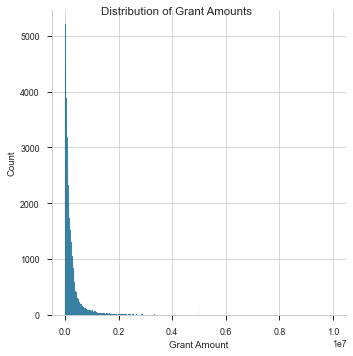

In [44]:
sns.set_context('paper')

# Create distribution plot of 'GrantAmount'
fig1 = sns.displot(data['GrantAmount'])

# Add a title "Distribution of Grant Amounts"
fig1.fig.suptitle("Distribution of Grant Amounts")
# Change x-axis label
fig1.set(xlabel="Grant Amount")
plt.show()

In [45]:
#Transform the GrantAmount variable into a base 10 logarithmic variable called 'log10_GrantAmount
data['log10_GrantAmount'] = np.log10(data['GrantAmount'])

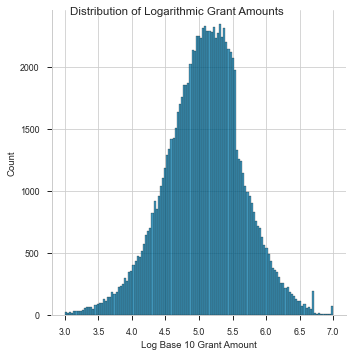

In [46]:
# Create a distribution graph of GrantAmount
fig2 = sns.displot(data, x="log10_GrantAmount")

# Add a title "Distribution of Grant Amounts"
fig2.fig.suptitle("Distribution of Logarithmic Grant Amounts")
# Change x-axis label
fig2.set(xlabel="Log Base 10 Grant Amount")

plt.show()

[Text(0.5, 0, 'State'), Text(0, 0.5, 'Count')]

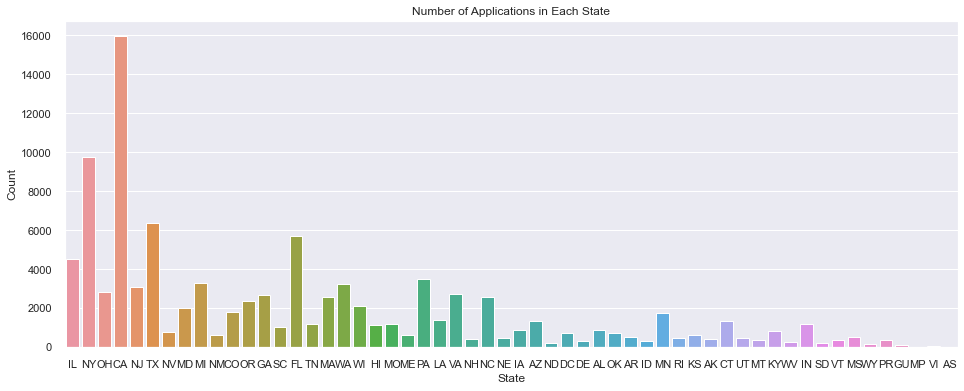

In [47]:
sns.set(rc={"figure.figsize":(16,6)})

fig3 = sns.barplot(y = 'GrantAmount',
            x ='BusinessState',    
            estimator=len,
            ci= None,
            data=data)

# Add a title "Number of Applications in Each State"
fig3.set_title("Number of Applications in Each State")

# Add x-axis and y-axis labels
fig3.set(xlabel="State",
      ylabel="Count")

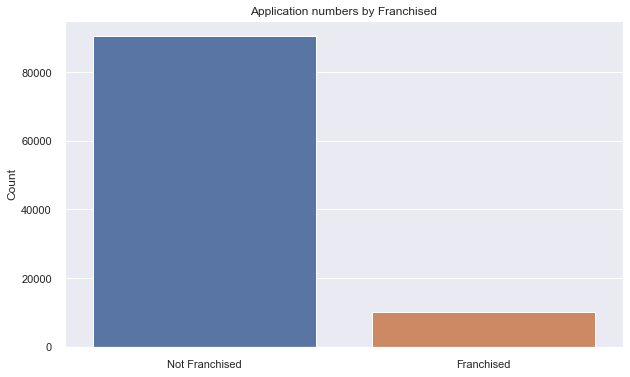

In [48]:
sns.set(rc={"figure.figsize":(10,6)})

#Countplot of Franchise
fig4 = sns.countplot(x ='Franchise',
            data=data)

# Add a title "Application numbers by Franchised"
fig4.set_title("Application numbers by Franchised")

# Add x-axis and y-axis labels
fig4.set(xlabel=None,
      ylabel="Count")

# Change x-tick labels 
fig4.set_xticklabels(["Not Franchised","Franchised"])
plt.show()

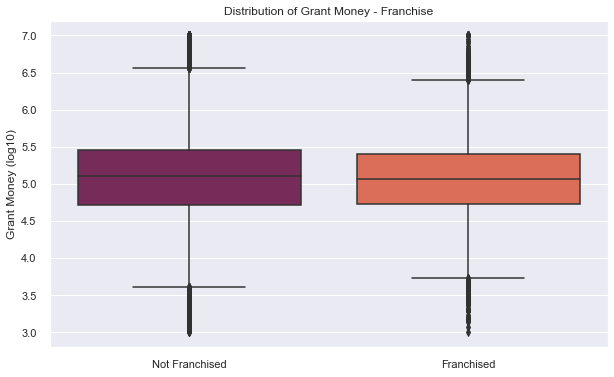

In [49]:
# Boxplot
sns.set(rc={"figure.figsize":(10,6)})
fig5 = sns.boxplot(x='Franchise', 
                 y= data['log10_GrantAmount'], 
                 data=data, 
                palette = "rocket")

# Add a title "Distribution of Grant Money - Franchise"
fig5.set_title("Distribution of Grant Money - Franchise")

# Change x-axis and y-axis labels
fig5.set(xlabel= None,
      ylabel="Grant Money (log10)")

#Change x tick labels 
fig5.set_xticklabels(["Not Franchised","Franchised"])
plt.show()

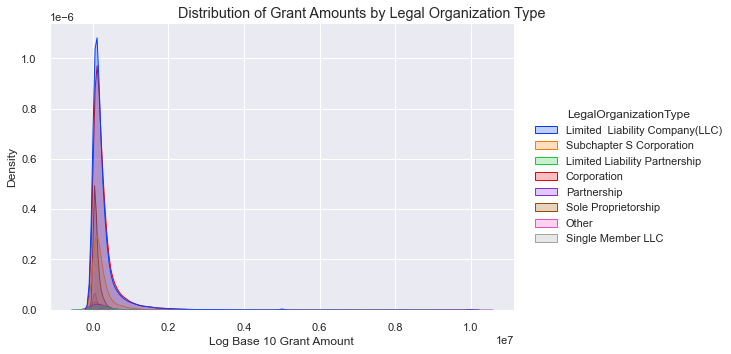

In [50]:
#Create distubition plot of 'log10_GrantAmount' in relation to 'LegalOrganizationType'
fig7 = sns.displot(data=data, 
            x='GrantAmount', 
            hue='LegalOrganizationType', 
            kind='kde', 
            fill=True,  
            palette=sns.color_palette('bright')[:8], 
            height=5, 
            aspect=1.5)

# Add a title "Distribution of Grant Amounts by Legal Organization Type"
fig7.fig.suptitle("Distribution of Grant Amounts by Legal Organization Type")
# Change x-axis label
fig7.set(xlabel="Log Base 10 Grant Amount")

In [51]:
# Reorginize DataFrame to show states in order
data = data.sort_values(['BusinessState'], ascending=True).reset_index(drop=True)

[Text(0.5, 0, 'State'), Text(0, 0.5, 'Grant Amount (in Billions)')]

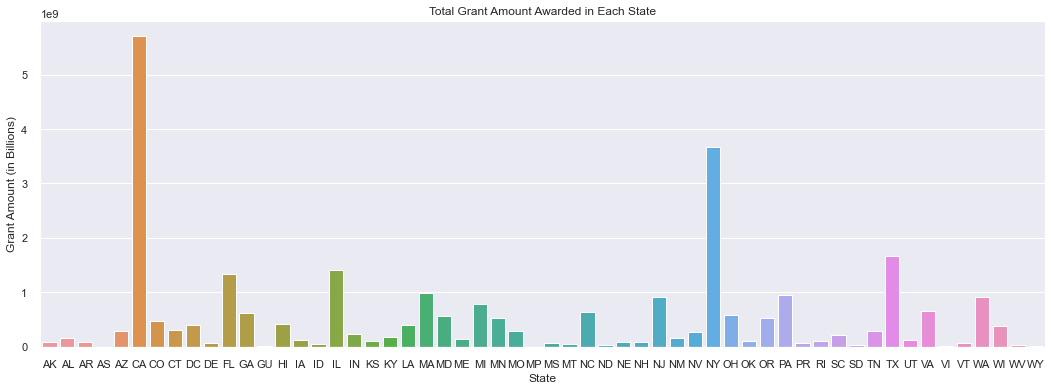

In [52]:
sns.set(rc={"figure.figsize":(18,6)})
#Create bar plot of sum of 'GrantAmount' in relation to 'BusinessState'
fig8 = sns.barplot(y ='GrantAmount',
            x ='BusinessState',
            estimator=sum,
            ci= None,
            data=data)

# Add a title "Number of Applications in Each State"
fig8.set_title("Total Grant Amount Awarded in Each State");

# Add x-axis and y-axis labels
fig8.set(xlabel="State",
      ylabel="Grant Amount (in Billions)")


[Text(0.5, 0, 'State'), Text(0, 0.5, 'Grant Amount')]

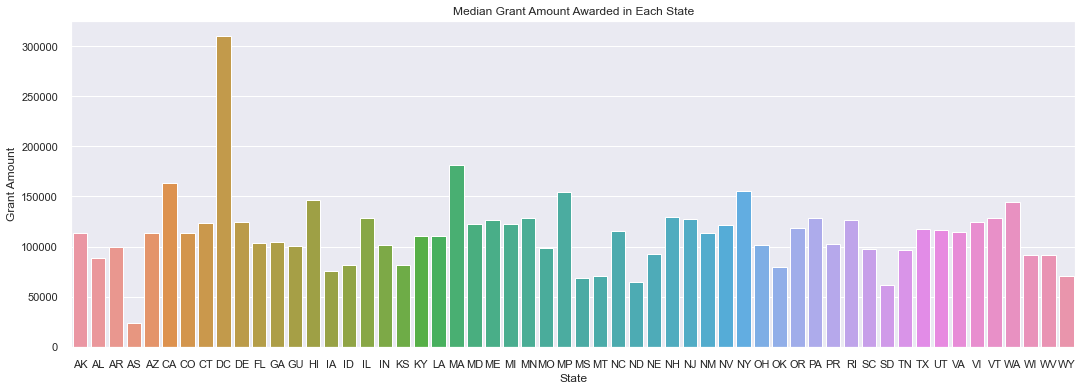

In [53]:
#Create bar plot of median 'GrantAmount' in relation to 'BusinessState'
fig9 = sns.barplot(y = 'GrantAmount',
            x ='BusinessState',
            estimator=np.median,
            ci= None,
            data=data)

# Add a title "Median Grant Amount in Each State"
fig9.set_title("Median Grant Amount Awarded in Each State");

# Add x-axis and y-axis labels
fig9.set(xlabel="State",
      ylabel="Grant Amount")


In [54]:
# Drop 'GrantAmount and BusinessState' column
data = data.drop((['GrantAmount', 'BusinessState']), axis = 1)

In [55]:
#Transform categorical variables to numeric using dummy variables and dropping one column to meet n-1
data = pd.get_dummies(data, drop_first=True)

In [56]:
#Check that dummy variables properly transformed
data.info

<bound method DataFrame.info of         log10_GrantAmount  RuralUrbanIndicator_U  HubzoneIndicator_Y  \
0                4.928933                      0                   1   
1                4.885662                      0                   1   
2                5.791745                      1                   0   
3                4.404029                      1                   0   
4                5.059366                      0                   0   
...                   ...                    ...                 ...   
100641           5.542459                      0                   0   
100642           4.486062                      1                   0   
100643           5.319151                      0                   0   
100644           4.846635                      0                   0   
100645           5.025421                      1                   1   

        CD_AL-01  CD_AL-02  CD_AL-03  CD_AL-04  CD_AL-05  CD_AL-06  CD_AL-07  \
0              0       

In [57]:
#Create correlation plot of DateFrame
corr_abs = data.corr().abs()
display(corr_abs)

,log10_GrantAmount,RuralUrbanIndicator_U,HubzoneIndicator_Y,CD_AL-01,CD_AL-02,CD_AL-03,CD_AL-04,CD_AL-05,CD_AL-06,CD_AL-07,...,Other_1,"Food Stand, Food Truck, Food Cart_1",Snack and Nonalcoholic Beverage Bar_1,Bakery_1,Licensed Alcohol Producer_1,Brewery and/or microbrewery_1,"Brewpub, Tasting Room, Taproom_1",Inn_1,Winery_1,Distillery_1
log10_GrantAmount,1.000000,0.135540,0.009107,0.008595,0.015893,0.009879,0.011614,0.012446,0.005190,0.004008,...,0.034079,0.162814,0.069633,0.073336,0.024553,0.009880,0.004160,0.034873,0.023835,0.003474
RuralUrbanIndicator_U,0.135540,1.000000,0.085833,0.030603,0.047951,0.037566,0.043471,0.007085,0.015686,0.011835,...,0.015880,0.003343,0.019842,0.001800,0.034336,0.026577,0.030749,0.068544,0.038268,0.015541
HubzoneIndicator_Y,0.009107,0.085833,1.000000,0.005443,0.005884,0.021315,0.009656,0.004683,0.016873,0.029307,...,0.007378,0.009834,0.001045,0.000315,0.007169,0.021118,0.018283,0.004308,0.005903,0.005885
CD_AL-01,0.008595,0.030603,0.005443,1.000000,0.001323,0.001173,0.001002,0.001337,0.001629,0.001002,...,0.005829,0.008609,0.003823,0.001785,0.001966,0.002045,0.000466,0.002317,0.002345,0.001243
CD_AL-02,0.015893,0.047951,0.005884,0.001323,1.000000,0.001200,0.001024,0.001368,0.001666,0.001024,...,0.001587,0.002665,0.004091,0.000181,0.002117,0.003657,0.002050,0.002370,0.002398,0.001271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brewery and/or microbrewery_1,0.009880,0.026577,0.021118,0.002045,0.003657,0.003243,0.002769,0.001738,0.004502,0.002769,...,0.032242,0.021286,0.011896,0.009097,0.311124,1.000000,0.547430,0.000112,0.086798,0.057985
"Brewpub, Tasting Room, Taproom_1",0.004160,0.030749,0.018283,0.000466,0.002050,0.003869,0.003303,0.000165,0.005371,0.003303,...,0.049732,0.025480,0.009831,0.010712,0.318843,0.547430,1.000000,0.008249,0.179397,0.106685
Inn_1,0.034873,0.068544,0.004308,0.002317,0.002370,0.002102,0.001794,0.002396,0.002918,0.001794,...,0.013869,0.014606,0.001329,0.000538,0.009329,0.000112,0.008249,1.000000,0.010112,0.006749
Winery_1,0.023835,0.038268,0.005903,0.002345,0.002398,0.002127,0.001816,0.002425,0.002953,0.001816,...,0.019003,0.014853,0.009017,0.002779,0.213780,0.086798,0.179397,0.010112,1.000000,0.099750


In [58]:
# Remove redundant information from correleation plot
upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(bool))
display(upper_tri)

,log10_GrantAmount,RuralUrbanIndicator_U,HubzoneIndicator_Y,CD_AL-01,CD_AL-02,CD_AL-03,CD_AL-04,CD_AL-05,CD_AL-06,CD_AL-07,...,Other_1,"Food Stand, Food Truck, Food Cart_1",Snack and Nonalcoholic Beverage Bar_1,Bakery_1,Licensed Alcohol Producer_1,Brewery and/or microbrewery_1,"Brewpub, Tasting Room, Taproom_1",Inn_1,Winery_1,Distillery_1
log10_GrantAmount,NaN,0.13554,0.009107,0.008595,0.015893,0.009879,0.011614,0.012446,0.005190,0.004008,...,0.034079,0.162814,0.069633,0.073336,0.024553,0.009880,0.004160,0.034873,0.023835,0.003474
RuralUrbanIndicator_U,NaN,NaN,0.085833,0.030603,0.047951,0.037566,0.043471,0.007085,0.015686,0.011835,...,0.015880,0.003343,0.019842,0.001800,0.034336,0.026577,0.030749,0.068544,0.038268,0.015541
HubzoneIndicator_Y,NaN,NaN,NaN,0.005443,0.005884,0.021315,0.009656,0.004683,0.016873,0.029307,...,0.007378,0.009834,0.001045,0.000315,0.007169,0.021118,0.018283,0.004308,0.005903,0.005885
CD_AL-01,NaN,NaN,NaN,NaN,0.001323,0.001173,0.001002,0.001337,0.001629,0.001002,...,0.005829,0.008609,0.003823,0.001785,0.001966,0.002045,0.000466,0.002317,0.002345,0.001243
CD_AL-02,NaN,NaN,NaN,NaN,NaN,0.001200,0.001024,0.001368,0.001666,0.001024,...,0.001587,0.002665,0.004091,0.000181,0.002117,0.003657,0.002050,0.002370,0.002398,0.001271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brewery and/or microbrewery_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547430,0.000112,0.086798,0.057985
"Brewpub, Tasting Room, Taproom_1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008249,0.179397,0.106685
Inn_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010112,0.006749
Winery_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099750


In [59]:
# Drop 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [60]:
# Add constant variable to new DataFrame 'X1' for modeling
X1 = sm.tools.add_constant(data)

In [61]:
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)

KeyboardInterrupt: 

In [ ]:
# display the series
display(series_before[[series_before][0] > 5])

const       394.087099
CD_NY-07      5.256362
dtype: float64

In [ ]:
# define our input variable (X) & output variable
X = X1.drop('log10_GrantAmount', axis = 1)
Y = X1[['log10_GrantAmount']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
initial_model = sm.OLS(y_train, X_train).fit()
display(initial_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log10_GrantAmount   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     51.36
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        15:35:59   Log-Likelihood:                -59270.
No. Observations:               80516   AIC:                         1.195e+05
Df Residuals:                   80032   BIC:                         1.240e+05
Df Model:                         483                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     4.5044      0.032    140.456      0.000       4.442       4.567
RuralUrbanIndicator_U                                     0.1047      0.007     15.049      0.000       0.091       0.118
HubzoneIndicator_Y                                        0.0256      0.004      6.029      0.000       0.017       0.034
CD_AL-01                                                 -0.1264      0.058     -2.189      0.029      -0.240      -0.013
CD_AL-02                                                 -0.2178      0.056     -3.913      0.000      -0.327      -0.109
CD_AL-03                                                 -0.1682      0.063     -2.685      0.007      -0.291      -0.045
CD_AL-04                                                 -0.2291      0.069     -3.300      0.001      -0.365      -0.093
CD_AL-05                                                 -0.1903      0.056     -3.396      0.001      -0.300      -0.080
CD_AL-06                                                 -0.0695      0.050     -1.396      0.163      -0.167       0.028
CD_AL-07                                                 -0.1103      0.068     -1.619      0.106      -0.244       0.023
CD_AR-01                                                 -0.1415      0.065     -2.170      0.030      -0.269      -0.014
CD_AR-02                                                 -0.1167      0.053     -2.206      0.027      -0.220      -0.013
CD_AR-03                                                 -0.1403      0.051     -2.756      0.006      -0.240      -0.041
CD_AR-04                                                 -0.2083      0.079     -2.640      0.008      -0.363      -0.054
CD_AS-                                                   -0.8286      0.508     -1.632      0.103      -1.824       0.166
CD_AZ-01                                                 -0.0737      0.051     -1.443      0.149      -0.174       0.026
CD_AZ-02                                                 -0.1264      0.053     -2.364      0.018      -0.231      -0.022
CD_AZ-03                                                 -0.0853      0.065     -1.315      0.189      -0.212       0.042
CD_AZ-04                                                 -0.0776      0.062     -1.250      0.211      -0.199       0.044
CD_AZ-05                                                 -0.1916      0.056     -3.426      0.001      -0.301      -0.082
CD_AZ-06                                                 -0.0798      0.046     -1.719      0.086      -0.171       0.011
CD_AZ-07                                                  0.0233      0.051      0.455      0.649      -0.077       0.124
CD_AZ-08                         

In [ ]:
dropped_features = ['CD_AL-06', 'CD_AL-07', 'CD_AL-05','CD_AL-03', 'CD_AL-01', 'CD_AR-01', 'CD_AR-02', 'CD_AR-03', 'CD_AR-04', 'CD_AZ-01', 'CD_AZ-02', 'CD_AZ-03', 'CD_AZ-05', 'CD_AZ-06', 
                    'CD_AZ-08', 'CD_AZ-09', 'CD_AZ-04', 'CD_AS-', 'CD_CA-04', 'CD_CA-07', 'CD_CA-08', 'CD_CA-09', 'CD_CA-10', 'CD_CA-16', 'CD_CA-23', 'CD_CA-24', 'CD_CA-25', 'CD_CA-29', 
                    'CD_CA-31', 'CD_CA-35', 'CD_WY-01', 'CD_WY-02', 'CD_CA-03', 'CD_WV-02', 'CD_WI-04', 'CD_WI-02', 'CD_WA-10', 'CD_WA-08', 'CD_WA-06', 'CD_WA-05', 'CD_WA-04', 'CD_WA-03', 
                    'CD_WA-02', 'CD_VT-', 'CD_VI-', 'CD_VA-11', 'CD_VA-09', 'CD_VA-07', 'CD_VA-06', 'CD_VA-05', 'CD_VA-04', 'CD_VA-03', 'CD_UT-04', 'CD_UT-03', 'CD_UT-02', 'CD_TX-36', 
                    'CD_TX-35', 'CD_TX-34', 'CD_TX-33', 'CD_TX-32', 'CD_TX-31', 'CD_TX-29', 'CD_TX-28', 'CD_TX-27', 'CD_TX-25', 'CD_TX-24', 'CD_TX-22', 'CD_TX-20', 'CD_TX-19', 'CD_TX-18',
                    'CD_TX-17', 'CD_TX-16', 'CD_TX-12', 'CD_TX-11', 'CD_TX-09', 'CD_TX-08', 'CD_TX-07', 'CD_TX-05', 'CD_TX-03', 'CD_TX-02', 'CD_TX-01', 'CD_TN-09', 'CD_TN-06', 'CD_TN-04', 
                    'CD_TN-03', 'CD_TN-02', 'CD_SD-04', 'CD_SD-03', 'CD_SC-06', 'CD_SC-02', 'CD_SC-01', 'CD_RI-02', 'CD_RI-01', 'CD_PA-17', 'CD_PA-16', 'CD_PA-15', 'CD_PA-14', 'CD_PA-13',
                    'CD_PA-12', 'CD_PA-11', 'CD_PA-07', 'CD_PA-06', 'CD_PA-05', 'CD_PA-04', 'CD_PA-02', 'CD_PA-01', 'CD_OR-03', 'CD_OR-01', 'CD_OK-05', 'CD_OH-16', 'CD_OH-15', 'CD_OH-13', 
                    'CD_OH-12', 'CD_OH-11', 'CD_OH-09', 'CD_OH-07', 'CD_OH-06', 'CD_OH-03', 'CD_OH-02', 'CD_NY-26', 'CD_NY-25', 'CD_NY-24', 'CD_NY-23', 'CD_NY-20', 'CD_NY-19', 'CD_NY-17', 
                    'CD_NY-16', 'CD_NY-14', 'CD_NY-13', 'CD_NY-11', 'CD_NY-09', 'CD_NY-08', 'CD_NY-06', 'CD_NY-03', 'CD_NY-02', 'CD_NV-03', 'CD_NV-02', 'CD_NM-02', 'CD_NM-01', 'CD_NJ-12', 
                    'CD_NJ-11', 'CD_NJ-07', 'CD_NJ-05', 'CD_NJ-03', 'CD_NJ-02', 'CD_NJ-01','CD_NH-02','CD_NH-01','CD_NE-02', 'CD_NC-09', 'CD_NC-08', 'CD_NC-07', 'CD_NC-06', 'CD_NC-05', 
                    'CD_NC-04', 'CD_NC-01', 'CD_MT-01', 'CD_MS-03', 'CD_MP-', 'CD_MO-05', 'CD_MO-03', 'CD_MO-02', 'CD_MO-05', 'CD_MN-08', 'CD_MN-07', 'CD_MN-06', 'CD_MN-02', 'CD_MN-01',
                    'CD_MI-14', 'CD_MI-13', 'CD_MI-12', 'CD_MI-11', 'CD_MI-10', 'CD_MI-09', 'CD_MI-08', 'CD_MI-07', 'CD_MI-06', 'CD_MI-05', 'CD_MI-04', 'CD_MI-03', 'CD_MI-02', 'CD_ME-02', 
                    'CD_MD-07', 'CD_MD-05', 'CD_MD-04', 'CD_MD-03', 'CD_MD-02', 'CD_MD-01', 'CD_MA-04', 'CD_MA-03', 'CD_MA-02', 'CD_MA-01', 'CD_LA-06', 'CD_LA-05', 'CD_LA-03', 'CD_KY-06', 
                    'CD_KY-05', 'CD_KY-04', 'CD_KY-03', 'CD_KY-02', 'CD_KY-01', 'CD_KS-03', 'CD_IN-07', 'CD_IN-06', 'CD_IN-05', 'CD_IN-03', 'CD_IN-01', 'CD_IL-18', 'CD_IL-13', 'CD_IL-12',
                    'CD_IL-11', 'CD_IL-10', 'CD_IL-09', 'CD_IL-08', 'CD_IL-06', 'CD_IL-04', 'CD_IL-02', 'CD_IL-01', 'CD_ID-01', 'CD_IA-03', 'CD_GU-', 'CD_GA-14', 'CD_GA-12', 'CD_GA-09',
                    'CD_GA-08', 'CD_GA-06', 'CD_GA-03', 'CD_GA-02', 'CD_GA-01', 'CD_FL-26', 'CD_FL-25', 'CD_FL-22', 'CD_FL-21', 'CD_FL-20', 'CD_FL-14', 'CD_FL-11', 'CD_FL-09', 'CD_FL-05', 
                    'CD_FL-01', 'CD_DE-01', 'CD_DE-', 'CD_CT-04', 'CD_CT-03', 'CD_CT-02', 'CD_CT-01', 'CD_CT-05', 'CD_CO-07', 'CD_CO-06', 'CD_CO-05', 'CD_CO-02', 'CD_CA-53', 'CD_CA-50', 
                    'CD_CA-47', 'CD_CA-44', 'CD_CA-42', 'CD_CA-40', 'CD_CA-49', 'CD_MO-08', 'CD_OH-10', 'CD_WV-01', 'CD_RI-01', 'CD_RI-02', 'CD_TX-14', 'Distillery_1', 
                    'Brewery and/or microbrewery_1', 'Brewpub, Tasting Room, Taproom_1', 'CD_GA-10']

In [ ]:
X_train.drop((dropped_features), axis=1, inplace=True)

'CD_AL-06', 'CD_AL-07', 'CD_AL-05','CD_AL-03', 'CD_AL-01', 'CD_AR-01', 'CD_AR-02', 'CD_AR-03', 'CD_AR-04', 'CD_AZ-01', 'CD_AZ-02', 'CD_AZ-03', 'CD_AZ-05', 'CD_AZ-06', 'CD_AZ-08', 'CD_AZ-09', 'CD_AZ-04', 'CD_AS-', 'CD_CA-04', 'CD_CA-07', 'CD_CA-08', 'CD_CA-09', 'CD_CA-10', 'CD_CA-16', 'CD_CA-23', 'CD_CA-24', 'CD_CA-25', 'CD_CA-29', 'CD_CA-31', 'CD_CA-35', 'CD_WY-01', 'CD_WY-02', 'CD_CA-03', 'CD_WV-02', 'CD_WI-04', 'CD_WI-02', 'CD_WA-10', 'CD_WA-08', 'CD_WA-06', 'CD_WA-05', 'CD_WA-04', 'CD_WA-03', 'CD_WA-02', 'CD_VT-', 'CD_VI-', 'CD_VA-11', 'CD_VA-09', 'CD_VA-07', 'CD_VA-06', 'CD_VA-05', 'CD_VA-04', 'CD_VA-03', 'CD_UT-04', 'CD_UT-03', 'CD_UT-02', 'CD_TX-36', 'CD_TX-35', 'CD_TX-34', 'CD_TX-33', 'CD_TX-32', 'CD_TX-31', 'CD_TX-29', 'CD_TX-28', 'CD_TX-27', 'CD_TX-25', 'CD_TX-24', 'CD_TX-22', 'CD_TX-20', 'CD_TX-19', 'CD_TX-18', 'CD_TX-17', 'CD_TX-16', 'CD_TX-12', 'CD_TX-11', 'CD_TX-09', 'CD_TX-08', 'CD_TX-07', 'CD_TX-05', 'CD_TX-03', 'CD_TX-02', 'CD_TX-01', 'CD_TN-09', 'CD_TN-06', 'CD_TN-04', 'CD_TN-03', 'CD_TN-02', 'CD_SD-04', 'CD_SD-03', 'CD_SC-06', 'CD_SC-02', 'CD_SC-01', 'CD_RI-02', 'CD_RI-01', 'CD_PA-17', 'CD_PA-16', 'CD_PA-15', 'CD_PA-14', 'CD_PA-13', 'CD_PA-12', 'CD_PA-11', 'CD_PA-07', 'CD_PA-06', 'CD_PA-05', 'CD_PA-04', 'CD_PA-02', 'CD_PA-01', 'CD_OR-03', 'CD_OR-01', 'CD_OK-05', 'CD_OH-16', 'CD_OH-15', 'CD_OH-13', 'CD_OH-12', 'CD_OH-11', 'CD_OH-09', 'CD_OH-07', 'CD_OH-06', 'CD_OH-03', 'CD_OH-02', 'CD_NY-26', 'CD_NY-25', 'CD_NY-24', 'CD_NY-23', 'CD_NY-20', 'CD_NY-19', 'CD_NY-17', 'CD_NY-16', 'CD_NY-14', 'CD_NY-13', 'CD_NY-11', 'CD_NY-09', 'CD_NY-08', 'CD_NY-06', 'CD_NY-03', 'CD_NY-02', 'CD_NV-03', 'CD_NV-02', 'CD_NM-02', 'CD_NM-01', 'CD_NJ-12', 'CD_NJ-11', 'CD_NJ-07', 'CD_NJ-05', 'CD_NJ-03', 'CD_NJ-02', 'CD_NJ-01','CD_NH-02','CD_NH-01','CD_NE-02', 'CD_NC-09', 'CD_NC-08', 'CD_NC-07', 'CD_NC-06', 'CD_NC-05', 'CD_NC-04', 'CD_NC-01', 'CD_MT-01', 'CD_MS-03', 'CD_MP-', 'CD_MO-05', 'CD_MO-03', 'CD_MO-02', 'CD_MO-05', 'CD_MN-08', 'CD_MN-07', 'CD_MN-06', 'CD_MN-02', 'CD_MN-01','CD_MI-14', 'CD_MI-13', 'CD_MI-12', 'CD_MI-11', 'CD_MI-10', 'CD_MI-09', 'CD_MI-08', 'CD_MI-07', 'CD_MI-06', 'CD_MI-05', 'CD_MI-04', 'CD_MI-03', 'CD_MI-02', 'CD_ME-02', 'CD_MD-07', 'CD_MD-05', 'CD_MD-04', 'CD_MD-03', 'CD_MD-02', 'CD_MD-01', 'CD_MA-04', 'CD_MA-03', 'CD_MA-02', 'CD_MA-01', 'CD_LA-06', 'CD_LA-05', 'CD_LA-03', 'CD_KY-06', 'CD_KY-05', 'CD_KY-04', 'CD_KY-03', 'CD_KY-02', 'CD_KY-01', 'CD_KS-03', 'CD_IN-07', 'CD_IN-06', 'CD_IN-05', 'CD_IN-03', 'CD_IN-01', 'CD_IL-18', 'CD_IL-13', 'CD_IL-12', 'CD_IL-11', 'CD_IL-10', 'CD_IL-09', 'CD_IL-08', 'CD_IL-06', 'CD_IL-04', 'CD_IL-02', 'CD_IL-01', 'CD_ID-01', 'CD_IA-03', 'CD_GU-', 'CD_GA-14', 'CD_GA-12', 'CD_GA-09', 'CD_GA-08', 'CD_GA-06', 'CD_GA-03', 'CD_GA-02', 'CD_GA-01', 'CD_FL-26', 'CD_FL-25', 'CD_FL-22', 'CD_FL-21', 'CD_FL-20', 'CD_FL-14', 'CD_FL-11', 'CD_FL-09', 'CD_FL-05', 'CD_FL-01', 'CD_DE-01', 'CD_DE-', 'CD_CT-04', 'CD_CT-03', 'CD_CT-02', 'CD_CT-01', 'CD_CT-05', 'CD_CO-07', 'CD_CO-06', 'CD_CO-05', 'CD_CO-02', 'CD_CA-53', 'CD_CA-50', 'CD_CA-47', 'CD_CA-44', 'CD_CA-42', 'CD_CA-40', 'CD_CA-49', 'CD_MO-08', 'CD_OH-10', 'CD_WV-01', 'CD_RI-01', 'CD_RI-02', 'CD_TX-14', 'Distillery_1', 'Brewery and/or microbrewery_1', 'Brewpub, Tasting Room, Taproom_1', 'CD_GA-10'



In [ ]:
final_model = sm.OLS(y_train, X_train).fit()
display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log10_GrantAmount   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        15:36:01   Log-Likelihood:                -59431.
No. Observations:               80516   AIC:                         1.193e+05
Df Residuals:                   80296   BIC:                         1.213e+05
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     4.3983      0.013    334.808      0.000       4.373       4.424
RuralUrbanIndicator_U                                     0.1184      0.006     20.470      0.000       0.107       0.130
HubzoneIndicator_Y                                        0.0253      0.004      6.100      0.000       0.017       0.033
CD_AL-02                                                 -0.1165      0.047     -2.456      0.014      -0.209      -0.024
CD_AL-04                                                 -0.1278      0.063     -2.028      0.043      -0.251      -0.004
CD_AZ-07                                                  0.1147      0.042      2.735      0.006       0.033       0.197
CD_CA-01                                                  0.1010      0.034      2.992      0.003       0.035       0.167
CD_CA-02                                                  0.1343      0.027      5.028      0.000       0.082       0.187
CD_CA-05                                                  0.1772      0.041      4.309      0.000       0.097       0.258
CD_CA-06                                                  0.1075      0.034      3.137      0.002       0.040       0.175
CD_CA-11                                                  0.1457      0.028      5.113      0.000       0.090       0.202
CD_CA-12                                                  0.3574      0.016     21.721      0.000       0.325       0.390
CD_CA-13                                                  0.2141      0.025      8.652      0.000       0.166       0.263
CD_CA-14                                                  0.2373      0.025      9.444      0.000       0.188       0.287
CD_CA-15                                                  0.1918      0.032      6.062      0.000       0.130       0.254
CD_CA-17                                                  0.2223      0.024      9.355      0.000       0.176       0.269
CD_CA-18                                                  0.2102      0.030      7.082      0.000       0.152       0.268
CD_CA-19                                                  0.2227      0.039      5.638      0.000       0.145       0.300
CD_CA-20                                                  0.1205      0.039      3.063      0.002       0.043       0.198
CD_CA-21                                                  0.1042      0.048      2.179      0.029       0.010       0.198
CD_CA-22                                                  0.1658      0.066      2.509      0.012       0.036       0.295
CD_CA-26                                                  0.1361      0.041      3.335      0.001       0.056       0.216
CD_CA-27                         

In [ ]:
X_test = X_test.drop((dropped_features), axis= 1)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
predictions = pd.DataFrame(model.predict(X_test))

In [ ]:
y_test

,log10_GrantAmount
79293,5.485202
16199,5.424383
41136,5.328033
88827,4.452927
86639,4.966433
...,...
93113,5.750261
15317,5.826851
46894,4.638373
71426,4.891409


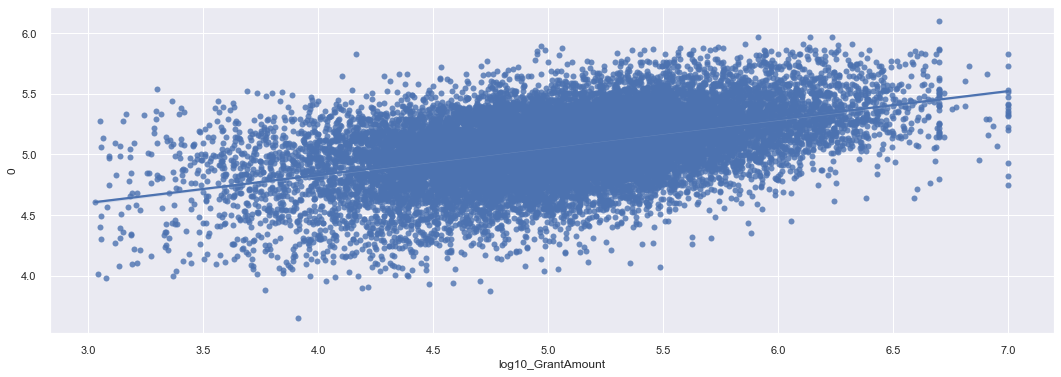

In [ ]:
sns.regplot(x = y_test['log10_GrantAmount'], 
            y = predictions[0])
plt.show()

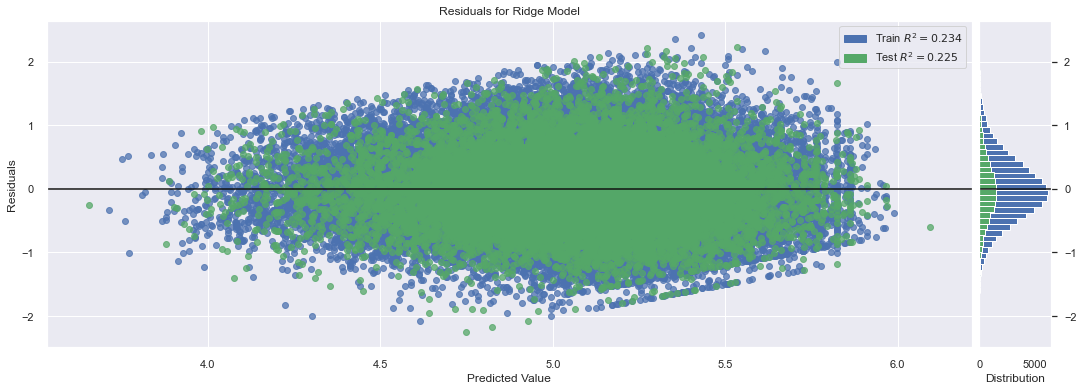

In [ ]:
#Model residual plot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()